In [2]:
import cv2
import os

data_path='Datasets'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'female': 0, 'male': 1}
['female', 'male']
[0, 1]


In [3]:
img_size=32
data=[]
target=[]

facedata = "haarcascade_frontalface_default.xml"
cascade = cv2.CascadeClassifier(facedata)


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        faces = cascade.detectMultiScale(img)
        try:
            for f in faces:
                x, y, w, h = [v for v in f]
                sub_face = img[y:y + h, x:x + w]
                gray=cv2.cvtColor(sub_face,cv2.COLOR_BGR2GRAY)           
                resized=cv2.resize(gray,(img_size,img_size))
                data.append(resized)
                target.append(label_dict[category])
        except Exception as e:
            print('Exception:',e)

In [4]:
!pip install keras

     ---------------------------------------- 1.7/1.7 MB 27.4 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install tensorflow

     -------------------------------------- 272.8/272.8 MB 7.2 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 39.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 440.7/440.7 kB ? eta 0:00:00
     ---------------------------------------- 420.6/420.6 kB ? eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 24.0 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 16.4 MB/s eta 0:00:00
     --------------------------------------- 24.4/24.4 MB 12.1 MB/s eta 0:00:00
     --------------------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mysql-connector-python 8.0.30 requires protobuf<=3.20.1,>=3.11.0, but you have protobuf 4.22.1 which is incompatible.

[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

import tensorflow.compat.v2 as tf
from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

np.save('./training/data',data)
np.save('./training/target',new_target)

In [5]:
import numpy as np

data=np.load('./training/data.npy')
target=np.load('./training/target.npy')

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint


noOfFilters=64
sizeOfFilter1=(3,3)
sizeOfFilter2=(3,3)
sizeOfPool=(2,2)
noOfNode=64



model=Sequential()
model.add((Conv2D(32, sizeOfFilter1, input_shape=data.shape[1:],activation='relu')))
model.add((Conv2D(32, sizeOfFilter1,activation='relu')))
model.add(MaxPooling2D(pool_size=sizeOfPool))

model.add((Conv2D(64, sizeOfFilter2,activation='relu')))
model.add((Conv2D(64, sizeOfFilter2,activation='relu')))
model.add(MaxPooling2D(pool_size=sizeOfPool))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(noOfNode, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [8]:
checkpoint = ModelCheckpoint('./training/model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
366/367 [============================>.] - ETA: 0s - loss: 0.5881 - accuracy: 0.6385

INFO:tensorflow:Assets written to: ./training\model-001.model\assets


INFO:tensorflow:Assets written to: ./training\model-001.model\assets


367/367 [==============================] - 24s 52ms/step - loss: 0.5879 - accuracy: 0.6387 - val_loss: 0.2722 - val_accuracy: 0.8990
Epoch 2/20
366/367 [============================>.] - ETA: 0s - loss: 0.2386 - accuracy: 0.9109

INFO:tensorflow:Assets written to: ./training\model-002.model\assets


INFO:tensorflow:Assets written to: ./training\model-002.model\assets


367/367 [==============================] - 17s 48ms/step - loss: 0.2385 - accuracy: 0.9110 - val_loss: 0.1584 - val_accuracy: 0.9458
Epoch 3/20
366/367 [============================>.] - ETA: 0s - loss: 0.1748 - accuracy: 0.9367

INFO:tensorflow:Assets written to: ./training\model-003.model\assets


INFO:tensorflow:Assets written to: ./training\model-003.model\assets


367/367 [==============================] - 18s 48ms/step - loss: 0.1753 - accuracy: 0.9366 - val_loss: 0.1537 - val_accuracy: 0.9522
Epoch 4/20
367/367 [==============================] - ETA: 0s - loss: 0.1524 - accuracy: 0.9477

INFO:tensorflow:Assets written to: ./training\model-004.model\assets


INFO:tensorflow:Assets written to: ./training\model-004.model\assets


367/367 [==============================] - 18s 48ms/step - loss: 0.1524 - accuracy: 0.9477 - val_loss: 0.1183 - val_accuracy: 0.9587
Epoch 5/20
367/367 [==============================] - 16s 44ms/step - loss: 0.1453 - accuracy: 0.9496 - val_loss: 0.1307 - val_accuracy: 0.9471
Epoch 6/20
367/367 [==============================] - ETA: 0s - loss: 0.1295 - accuracy: 0.9534

INFO:tensorflow:Assets written to: ./training\model-006.model\assets


INFO:tensorflow:Assets written to: ./training\model-006.model\assets


367/367 [==============================] - 18s 49ms/step - loss: 0.1295 - accuracy: 0.9534 - val_loss: 0.1149 - val_accuracy: 0.9591
Epoch 7/20
367/367 [==============================] - ETA: 0s - loss: 0.1197 - accuracy: 0.9574

INFO:tensorflow:Assets written to: ./training\model-007.model\assets


INFO:tensorflow:Assets written to: ./training\model-007.model\assets


367/367 [==============================] - 18s 50ms/step - loss: 0.1197 - accuracy: 0.9574 - val_loss: 0.1119 - val_accuracy: 0.9584
Epoch 8/20
367/367 [==============================] - 16s 44ms/step - loss: 0.1165 - accuracy: 0.9585 - val_loss: 0.1153 - val_accuracy: 0.9577
Epoch 9/20
367/367 [==============================] - 16s 45ms/step - loss: 0.1112 - accuracy: 0.9588 - val_loss: 0.1182 - val_accuracy: 0.9584
Epoch 10/20
367/367 [==============================] - 16s 45ms/step - loss: 0.1103 - accuracy: 0.9618 - val_loss: 0.1188 - val_accuracy: 0.9556
Epoch 11/20
367/367 [==============================] - ETA: 0s - loss: 0.1006 - accuracy: 0.9674

INFO:tensorflow:Assets written to: ./training\model-011.model\assets


INFO:tensorflow:Assets written to: ./training\model-011.model\assets


367/367 [==============================] - 19s 51ms/step - loss: 0.1006 - accuracy: 0.9674 - val_loss: 0.1091 - val_accuracy: 0.9587
Epoch 12/20
367/367 [==============================] - 17s 46ms/step - loss: 0.0949 - accuracy: 0.9654 - val_loss: 0.1310 - val_accuracy: 0.9519
Epoch 13/20
367/367 [==============================] - 16s 44ms/step - loss: 0.0952 - accuracy: 0.9660 - val_loss: 0.1237 - val_accuracy: 0.9577
Epoch 14/20
367/367 [==============================] - 16s 43ms/step - loss: 0.0874 - accuracy: 0.9689 - val_loss: 0.1210 - val_accuracy: 0.9601
Epoch 15/20
367/367 [==============================] - 16s 43ms/step - loss: 0.0825 - accuracy: 0.9698 - val_loss: 0.1133 - val_accuracy: 0.9594
Epoch 16/20
367/367 [==============================] - 16s 44ms/step - loss: 0.0846 - accuracy: 0.9697 - val_loss: 0.1138 - val_accuracy: 0.9594
Epoch 17/20
367/367 [==============================] - 16s 44ms/step - loss: 0.0776 - accuracy: 0.9712 - val_loss: 0.1239 - val_accuracy: 0.95

In [1]:
from keras.models import load_model
import cv2
import numpy as np

In [2]:
model = load_model('./training/model-007.model')

face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

cap=cv2.VideoCapture(0)

labels_dict={0:'Female',1:'Male'}
color_dict={0:(0,0,255),1:(0,255,0)}

In [3]:
while(True):

    ret,img=cap.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,3)  

    for (x,y,w,h) in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(32,32))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,32,32,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('Result',img)
    key=cv2.waitKey(1)
    
    if key==ord("q"):
        break
        
cv2.destroyAllWindows()
cap.release()

1/1 [==============================] - 0s 31ms/step


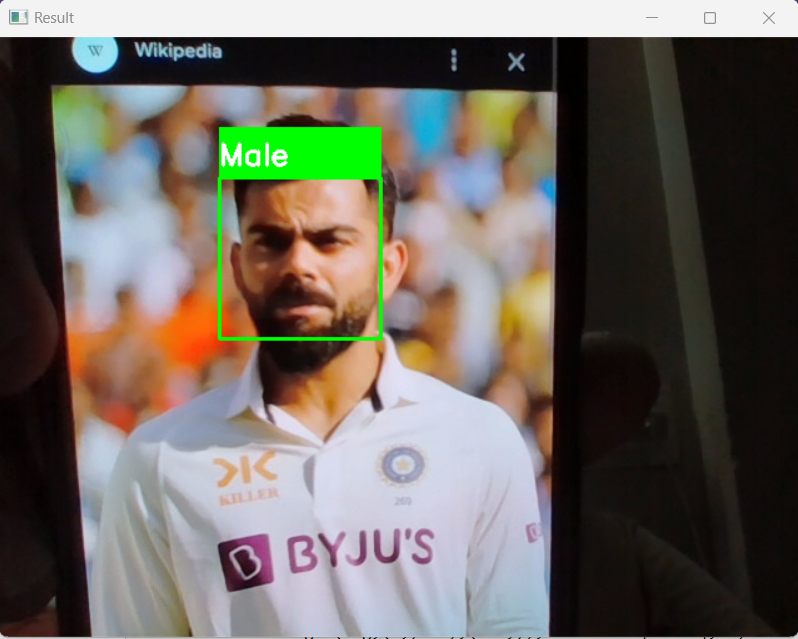

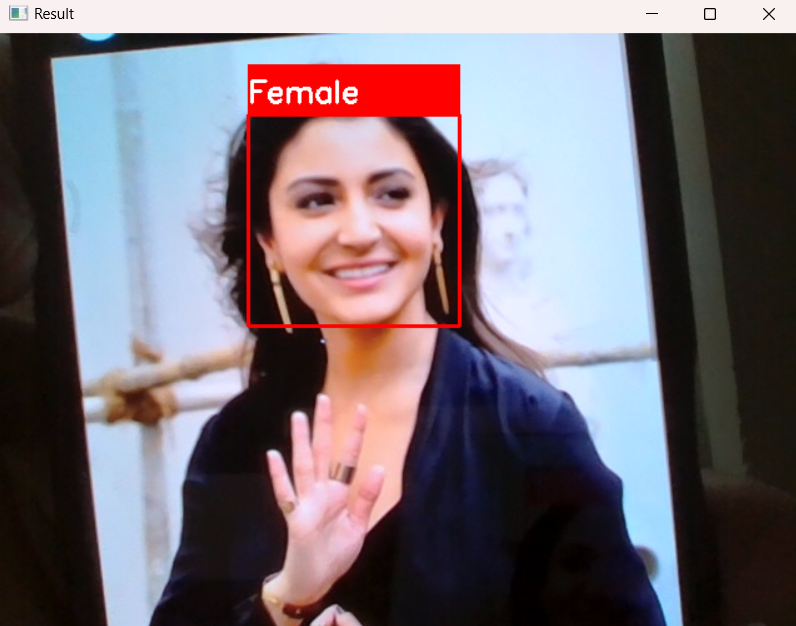